In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **# Step 1: Fetch Temperature Data from NASA**
bold textNASA provides the global temperature anomaly dataset as a .csv file.

We'll use the URL from NASA: 📄 Dataset URL:
https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv
*italicized text*

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from NASA GISTEMP
url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df = pd.read_csv(url, skiprows=1)

# Preview the data
df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-.10,-.17,-.11,-.22,-.19,-.11,-.15,-.24,-.23,-.18,-.18,***,***,-.12,-.17,-.21
1,1881,-0.21,-0.15,.02,.04,.05,-.20,-.01,-.05,-.16,-.22,-.19,-.08,-.10,-.10,-.18,.04,-.08,-.19
2,1882,0.15,0.13,.04,-.17,-.15,-.23,-.17,-.08,-.15,-.24,-.17,-.37,-.12,-.09,.07,-.09,-.16,-.19
3,1883,-0.30,-0.37,-.13,-.19,-.18,-.08,-.08,-.15,-.23,-.12,-.25,-.12,-.18,-.20,-.35,-.17,-.10,-.20
4,1884,-0.14,-0.09,-.37,-.40,-.34,-.35,-.31,-.28,-.27,-.25,-.34,-.31,-.29,-.27,-.11,-.37,-.32,-.29


# **Step 2: Clean the Data**
The data contains unnecessary columns like "J-D", "D-N", etc. We’ll focus only on the monthly columns (Jan to Dec) and Year.

In [4]:
# Keep only 'Year' and months Jan to Dec
df = df[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

# Drop rows with missing data
df = df.dropna()

# Convert monthly values to numeric (some may be strings)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Preview cleaned data
df.tail()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
141,2021,0.81,0.64,0.89,0.76,0.79,0.85,0.92,0.81,0.92,0.99,0.92,0.87
142,2022,0.91,0.89,1.05,0.83,0.84,0.93,0.94,0.95,0.89,0.97,0.73,0.80
143,2023,0.88,0.97,1.23,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.42,1.37
144,2024,1.26,1.43,1.39,1.32,1.16,1.24,1.20,1.30,1.23,1.34,1.29,1.26
145,2025,1.36,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Step 3: Line Plot – Global Annual Temperature Anomaly Trend**
This shows how global temperatures have risen over time.

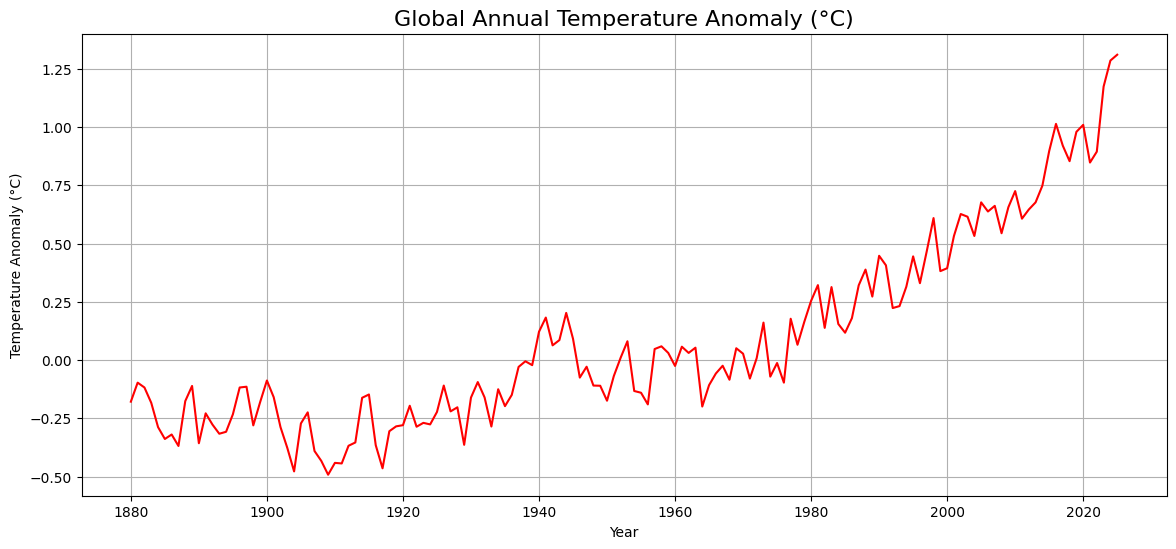

In [5]:
# Calculate yearly average anomaly
df['Annual Avg'] = df.iloc[:, 1:13].mean(axis=1)

# Plotting the line chart
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='Year', y='Annual Avg', color='red')
plt.title('Global Annual Temperature Anomaly (°C)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True)
plt.show()


# STEP 4 **Heatmap – Monthly Anomalies Over the Years**

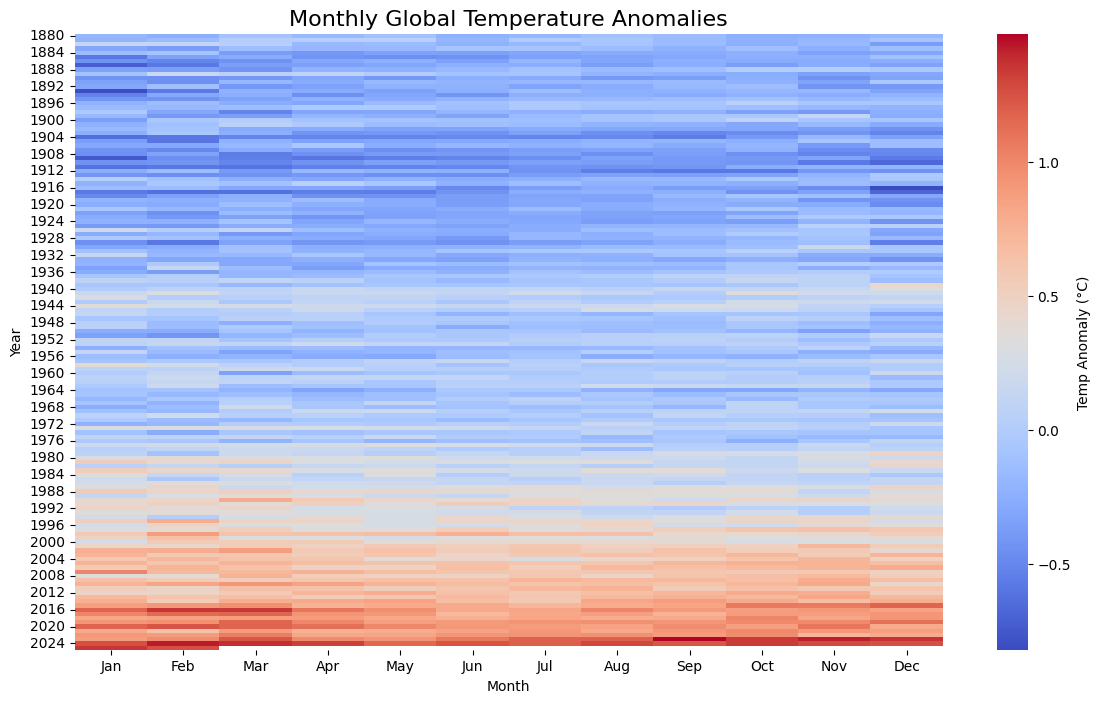

In [6]:
# Set the year as index
df_heatmap = df.set_index('Year')

# Remove the 'Annual Avg' column for heatmap
df_heatmap = df_heatmap.drop(columns=['Annual Avg'])

# Plot the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df_heatmap, cmap='coolwarm', cbar_kws={'label': 'Temp Anomaly (°C)'})
plt.title('Monthly Global Temperature Anomalies', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


# **Step 5: Conclusion: Global Warming Analysis**

This analysis uses NASA GISTEMP data to track temperature anomalies from the

early 20th century to the present.

The line plot shows a clear upward trend in global temperature anomalies, especially after the 1980s, indicating significant global warming.

The heatmap reveals that recent years have seen consistent warming across almost all months, highlighting the urgency of climate action.

This project emphasizes the importance of data-driven awareness in addressing climate change.